In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [272]:
def divdiff_node(X, Y, n, x, y):
    X[n + 1] = x
    Y[n + 1, 0] = y
    
    for i in range(1, n + 2): 

        Y[n + 1, i] = (Y[n + 1, i - 1] - Y[n, i - 1]) / (x - X[n - i + 1])
        
    return(n + 1)

In [314]:
def horner_newton(xi, X, Y, n):
    i = xi.shape[0]
    y = np.zeros(i)
    
    for i in range(n - 1, 0, -1):
        y = y + Y[i, i]
        y *= (xi - X[i - 1])
    
    y += Y[0, 0]
    return(y)

def interpolate(y, x, xi):
    n = x.shape[0]
    X = np.empty(n)
    Y = np.empty((n, n))

    for i in range(-1, n - 1):
        divdiff_node(X, Y, i, x[i + 1], y[i + 1])

    y = horner_newton(xi, X, Y, n)
        
    return(y)

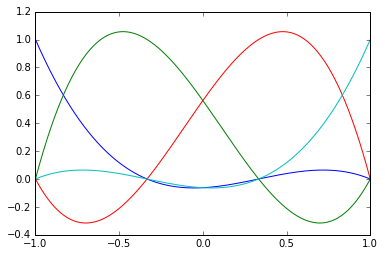

In [332]:
n = 4
x = np.linspace(-1, 1, 1001)
xi = np.linspace(-1, 1, n)
y = np.identity(n)
for i in range(n): plt.plot(x, interpolate(y[i], xi, x))

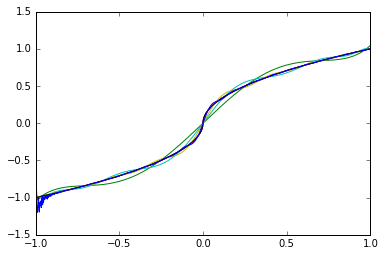

In [350]:
def tschebytschow(n):
    return(np.cos((2.0 * np.arange(0, n + 1) + 1) / (2.0 * (n + 1)) * np.pi))

f = lambda x: np.sign(x) * np.sqrt(np.abs(x))
for x in [5, 11, 21, 51]:
    xs = np.linspace(-1, 1, 1001)
    xi = tschebytschow(x)
    plt.plot(xs, f(xs))
    plt.plot(xs, interpolate(f(xi), xi, xs))

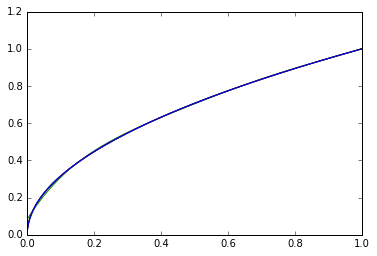

In [354]:
f = lambda x: np.sign(x) * np.sqrt(np.abs(x))
for x in [5, 11, 21, 51]:
    xs = np.linspace(0, 1, 1001)
    xi = (tschebytschow(x) + 1) / 2
    plt.plot(xs, f(xs))
    plt.plot(xs, interpolate(f(xi), xi, xs))